In [179]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import re
import datetime as dt
%matplotlib inline

In [180]:
'''
Importing the text file which contains the chat of the group
in read mode using utf-8 encoding!
This is my clg group chat,it contains chats from 2018,so its a very big
file,will preview it after we've done adding regular expressions!

'''

f = open('WhatsApp Chat with 2018-2022 IT-B (1).txt','r',encoding='utf-8')

data = f.read()



In [181]:
dummy = data.split('\n')
dummy

['3/29/20, 23:43 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.',
 '3/29/20, 23:34 - Sudhamani Mam created group "4ACSE _teachers_students"',
 "3/29/20, 23:43 - You joined using this group's invite link",
 "3/29/20, 23:43 - Nitya joined using this group's invite link",
 "3/29/20, 23:43 - +91 99648 20179 joined using this group's invite link",
 "3/29/20, 23:43 - Hardik (RNS) (CSE G) joined using this group's invite link",
 "3/29/20, 23:43 - +91 81528 80336 joined using this group's invite link",
 "3/29/20, 23:44 - Abhinav Dogra CSE(G) joined using this group's invite link",
 "3/29/20, 23:44 - avinash joined using this group's invite link",
 "3/29/20, 23:44 - Hrithik (RNSIT) (CSE G) joined using this group's invite link",
 "3/29/20, 23:46 - Muskaan (CSE G) (RNSIT) joined using this group's invite link",
 "3/29/20, 23:48 - Pratheek CSE G RNSIT joined using this group's invite link",
 "3/29/20, 2

## Splitting the data and storing it in dataframe

### Using regex to split messages and date

In [182]:
'''
Example for dry run : '16/08/18, 20:09 - '

\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s

the first part "d{1,2}" this means here we can have one or 2 digits
then after we have "/"
then after we have "d{1,2}" again,same we can have one or 2 digits
then after we have "/"
then after we have "d{2,4}" here we check for 2 or more digits
then we have a space represented as "\s"
then we have hour representation it can take either one or 2 digits 
then we have a seperator ":" 
and the pattern repeats so on..

'''

# username and message in different col

pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'
messages = re.split(pattern,data)[1:]
print(len(messages))

## extracting dates as well in different col

dates = re.findall(pattern,data)
print(len(dates))

4894
4894


In [183]:
# this is a simple time string,we will appply this kind of transformation
# inorder to get the date and the time for our analysis

string = '16/08/18, 20:09 - '
string = string.split(',')
date,time = string[0],string[1]
time = time.split('-')
time = time[0].strip()
print(date+" and "+time)

16/08/18 and 20:09


In [184]:
# this function is to seperate the time and date

def gettimeanddate(string):
    string = string.split(',')
    date,time = string[0],string[1]
    time = time.split('-')
    time = time[0].strip()
    
    return date+" "+time




In [185]:
# creating a dataframe for messages and their dates

df = pd.DataFrame({'user_messages':messages,
                   'message_date':dates})

df['message_date'] = df['message_date'].apply(lambda text:gettimeanddate(text))
df.rename(columns={'message_date':'date'},inplace=True)

df.head()

,user_messages,date
0,Messages and calls are end-to-end encrypted. N...,3/29/20 23:43
1,"Sudhamani Mam created group ""4ACSE _teachers_s...",3/29/20 23:34
2,You joined using this group's invite link\n,3/29/20 23:43
3,Nitya joined using this group's invite link\n,3/29/20 23:43
4,+91 99648 20179 joined using this group's invi...,3/29/20 23:43


In [186]:
df['user_messages']

0       Messages and calls are end-to-end encrypted. N...
1       Sudhamani Mam created group "4ACSE _teachers_s...
2             You joined using this group's invite link\n
3           Nitya joined using this group's invite link\n
4       +91 99648 20179 joined using this group's invi...
                              ...                        
4889    Rashmi Maam RNSIT: RNSIT Induction is inviting...
4890    Rashmi Maam RNSIT: Good morning students.. all...
4891        Rashmi Maam RNSIT: Attendance is compulsory\n
4892    Rashmi Maam RNSIT: Meeting started..All of you...
4893    Rashmi Maam RNSIT: https://docs.google.com/for...
Name: user_messages, Length: 4894, dtype: object

### Detaching username from messages column

In [187]:
'''
if we observe the usermessage,we find that the 
username is attached with the user message,so i need to get rid
of this,for that i will use the concept of the regular expression

sample of the regular expression output

['', 'Chinmayee', 'Hello this is official grup\n']

so here we can see that the username is at index 1 and message is at index2

sometimes it happens that we get the group notification,so 
for that case we have to handle it accordingly!


 Chinmayee: Hello this is official grup
 
 Chinmayee added you\n-->['Chinmayee added you','\n']

'''

users = []
messages = []

for message in df['user_messages']:
    
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])

        
    else:
        users.append('Group Notification')
        messages.append(entry[0])
        
        
df['User'] = users
df['message'] = messages


def getstring(text):
    return text.split('\n')[0]

df['message'] = df['message'].apply(lambda text:getstring(text))


df = df.drop(['user_messages'],axis=1)
df = df[['message','date','User']]

df = df.rename(columns={'message':'Message',
                       'date':'Date'})



df.head()

,Message,Date,User
0,Messages and calls are end-to-end encrypted. N...,3/29/20 23:43,Group Notification
1,"Sudhamani Mam created group ""4ACSE _teachers_s...",3/29/20 23:34,Group Notification
2,You joined using this group's invite link,3/29/20 23:43,Group Notification
3,Nitya joined using this group's invite link,3/29/20 23:43,Group Notification
4,+91 99648 20179 joined using this group's invi...,3/29/20 23:43,Group Notification


### Using pandas inbuilt functions to process date and time

16/08/18 20:09
    
YYYY-MM-DD

In [188]:
df.shape

(4894, 3)

In [189]:
df['Only date'] = pd.to_datetime(df['Date']).dt.date

df['Year'] = pd.to_datetime(df['Date']).dt.year

df['Month_num'] = pd.to_datetime(df['Date']).dt.month

df['Month'] = pd.to_datetime(df['Date']).dt.month_name()

df['Day'] = pd.to_datetime(df['Date']).dt.day

df['Day_name'] = pd.to_datetime(df['Date']).dt.day_name()


df['Hour'] = pd.to_datetime(df['Date']).dt.hour

df['Minute'] = pd.to_datetime(df['Date']).dt.minute


df.head()

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Messages and calls are end-to-end encrypted. N...,3/29/20 23:43,Group Notification,2020-03-29,2020,3,March,29,Sunday,23,43
1,"Sudhamani Mam created group ""4ACSE _teachers_s...",3/29/20 23:34,Group Notification,2020-03-29,2020,3,March,29,Sunday,23,34
2,You joined using this group's invite link,3/29/20 23:43,Group Notification,2020-03-29,2020,3,March,29,Sunday,23,43
3,Nitya joined using this group's invite link,3/29/20 23:43,Group Notification,2020-03-29,2020,3,March,29,Sunday,23,43
4,+91 99648 20179 joined using this group's invi...,3/29/20 23:43,Group Notification,2020-03-29,2020,3,March,29,Sunday,23,43


### Removing all group notifications sent by Whatsapp

In [190]:
df = df[df['User']!='Group Notification']

### Display messages of a particular user

In [191]:
user = 'Devraj Sir'
df[df['User'] == user]

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
456,Cr pls send ur number,9/2/20 12:13,Devraj Sir,2020-09-02,2020,9,September,2,Wednesday,12,13
460,,9/2/20 19:58,Devraj Sir,2020-09-02,2020,9,September,2,Wednesday,19,58
461,"Dear Students,",9/2/20 19:59,Devraj Sir,2020-09-02,2020,9,September,2,Wednesday,19,59
469,This message was deleted,9/4/20 09:27,Devraj Sir,2020-09-04,2020,9,September,4,Friday,9,27
470,,9/4/20 10:02,Devraj Sir,2020-09-04,2020,9,September,4,Friday,10,2
...,...,...,...,...,...,...,...,...,...,...,...
4314,,10/4/21 10:24,Devraj Sir,2021-10-04,2021,10,October,4,Monday,10,24
4332,"Dear Students ,those who opted Cryptography as...",10/4/21 14:12,Devraj Sir,2021-10-04,2021,10,October,4,Monday,14,12
4437,Dear students,10/13/21 10:16,Devraj Sir,2021-10-13,2021,10,October,13,Wednesday,10,16
4439,https://teams.microsoft.com/l/meetup-join/19%3...,10/13/21 10:51,Devraj Sir,2021-10-13,2021,10,October,13,Wednesday,10,51


### Extracting words out of messages

In [192]:
words = []
for message in df['Message']:
    words.extend(message.split())
    
print(len(words))

22597


In [193]:
words

['Gm',
 'dear',
 'students..',
 'Please',
 'go',
 'through',
 'the',
 'below',
 'contents,',
 'which',
 'was',
 'already',
 'discussed',
 'in',
 'the',
 'class.',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 'Dear',
 'students',
 'Yes',
 "ma'am",
 'Due',
 'to',
 'network',
 'issue',
 'it',
 'is',
 'not',
 'possible',
 'to',
 'engage',
 'my',
 'class',
 'in',
 'd',
 'allotted',
 'time',
 'today....shortly',
 'il',
 'be',
 'sending',
 'u',
 'd',
 'schedule',
 'for',
 'DC',
 'class...Thank',
 'you',
 'Dear',
 'students',
 '<Media',
 'omitted>',
 'Dear',
 'students',
 'pl',
 'find',
 'the',
 'attached',
 'document',
 '.',
 'This',
 'is',
 'OS',
 'assignment',
 'based',
 'on',
 '30/03/2020',
 'session.',
 'Quickly',
 'join',
 'the',
 'session',
 '<Media',
 'omitted>',
 'Assignment',
 'based',
 'on',
 '01/04/20',
 'session',
 'Good',
 'morning',
 'all,',
 'os',
 'class',
 'is',
 'done',
 'Dear',
 'students.',
 '<Media',
 'omitted>',
 'Dear'

### Analysing the media sent in group

In [194]:
user = 'Devraj Sir'
df[(df['Message'] == '<Media omitted>')&(df['User'] == user)]

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
521,<Media omitted>,9/12/20 11:01,Devraj Sir,2020-09-12,2020,9,September,12,Saturday,11,1
523,<Media omitted>,9/12/20 12:32,Devraj Sir,2020-09-12,2020,9,September,12,Saturday,12,32
536,<Media omitted>,9/14/20 15:13,Devraj Sir,2020-09-14,2020,9,September,14,Monday,15,13
548,<Media omitted>,9/15/20 14:22,Devraj Sir,2020-09-15,2020,9,September,15,Tuesday,14,22
555,<Media omitted>,9/16/20 12:19,Devraj Sir,2020-09-16,2020,9,September,16,Wednesday,12,19
...,...,...,...,...,...,...,...,...,...,...,...
1912,<Media omitted>,1/23/21 09:47,Devraj Sir,2021-01-23,2021,1,January,23,Saturday,9,47
1944,<Media omitted>,1/30/21 12:10,Devraj Sir,2021-01-30,2021,1,January,30,Saturday,12,10
1946,<Media omitted>,1/30/21 12:12,Devraj Sir,2021-01-30,2021,1,January,30,Saturday,12,12
1948,<Media omitted>,1/30/21 12:14,Devraj Sir,2021-01-30,2021,1,January,30,Saturday,12,14


In [195]:
df['Message'].unique()

array(['Gm dear students..',
       'Please go through the below contents, which was already discussed in the class.',
       '<Media omitted>', ...,
       'Good morning students.. all of you join to the meeting exactly @10:30 am',
       'Meeting started..All of you join to the meeting..',
       'https://docs.google.com/forms/d/e/1FAIpQLSct0EAMVeTOpSvDtYiW0-LSw4g3x5MK76h7rywa2YpO0-12nw/viewform?usp=sf_link'],
      dtype=object)

In [196]:
df[df['Message']=='<Media omitted>']

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
35,<Media omitted>,3/30/20 05:39,Sudhamani Mam,2020-03-30,2020,3,March,30,Monday,5,39
36,<Media omitted>,3/30/20 05:39,Sudhamani Mam,2020-03-30,2020,3,March,30,Monday,5,39
37,<Media omitted>,3/30/20 05:39,Sudhamani Mam,2020-03-30,2020,3,March,30,Monday,5,39
38,<Media omitted>,3/30/20 05:39,Sudhamani Mam,2020-03-30,2020,3,March,30,Monday,5,39
83,<Media omitted>,3/31/20 12:28,Sudhamani Mam,2020-03-31,2020,3,March,31,Tuesday,12,28
...,...,...,...,...,...,...,...,...,...,...,...
4880,<Media omitted>,1/21/22 15:36,Rashmi Maam RNSIT,2022-01-21,2022,1,January,21,Friday,15,36
4882,<Media omitted>,1/21/22 15:38,Rashmi Maam RNSIT,2022-01-21,2022,1,January,21,Friday,15,38
4885,<Media omitted>,1/21/22 18:02,Rashmi Maam RNSIT,2022-01-21,2022,1,January,21,Friday,18,2
4886,<Media omitted>,1/21/22 18:02,Rashmi Maam RNSIT,2022-01-21,2022,1,January,21,Friday,18,2


### Fequency of Messages sent by different users

In [197]:
df['User'].value_counts().head()

Rashmi Maam RNSIT    642
Chetan Sjr           599
+91 98808 22991      456
Devraj Sir           390
Ramya Maam Rnsit     361
Name: User, dtype: int64

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

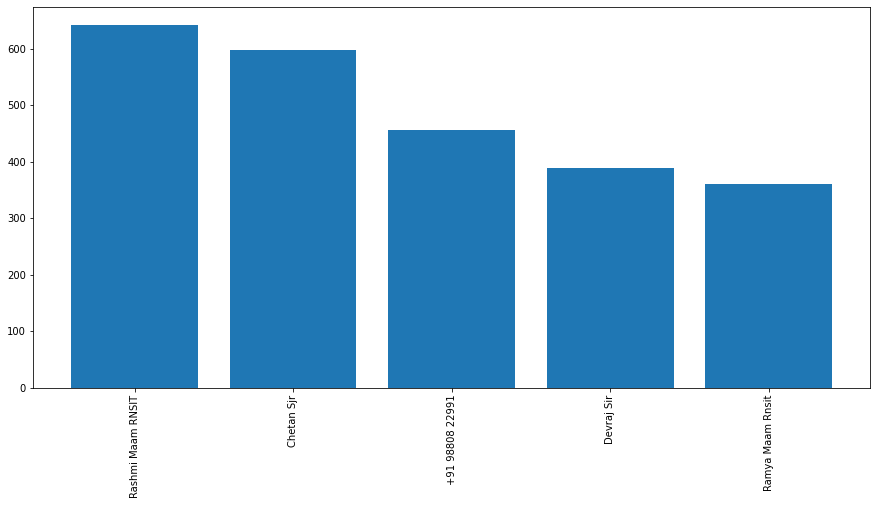

In [198]:
counts = df['User'].value_counts().head()
plt.figure(figsize=(15,7))
plt.bar(counts.index,counts.values)
plt.xticks(rotation = 'vertical')


### Generating wordmap

In [199]:
# computationally heavy

wordmap = {}
for message in df['Message']:
    dummy = message.split()
    for word in dummy:
        if word in wordmap:
            wordmap[word]+=1
            
        else:
            wordmap[word] = 1
            
            
wordmap = dict(sorted(wordmap.items(),key = lambda x:x[1],reverse = True))

wordmap

{'the': 805,
 '<Media': 684,
 'omitted>': 684,
 'to': 616,
 'Dear': 343,
 'for': 331,
 'Join': 319,
 'class': 306,
 'will': 268,
 'and': 253,
 'This': 251,
 'of': 239,
 'immediately': 238,
 'in': 228,
 'message': 223,
 'was': 220,
 'deleted': 220,
 'be': 215,
 'you': 208,
 'are': 206,
 'students': 202,
 'is': 179,
 'at': 178,
 'join': 164,
 'have': 149,
 'Students': 130,
 'link': 125,
 'on': 114,
 'all': 109,
 'am': 104,
 'not': 101,
 'form': 100,
 'your': 100,
 'from': 94,
 'this': 94,
 'by': 93,
 'CNS': 92,
 'All': 89,
 'students,': 85,
 'I': 85,
 'The': 83,
 'Students,': 77,
 'meeting': 76,
 'who': 73,
 'Rejoin': 71,
 'informed': 71,
 'as': 70,
 'above': 69,
 'lab': 68,
 'with': 66,
 'upload': 64,
 'session': 63,
 'hereby': 61,
 'it': 59,
 'USN': 59,
 'Link': 55,
 'You': 55,
 'test': 54,
 'without': 53,
 'WTA': 52,
 'if': 51,
 'pm': 51,
 '&': 51,
 'attend': 49,
 'CCA': 49,
 'using': 48,
 'before': 47,
 '#': 47,
 'include': 47,
 '@': 46,
 'Please': 45,
 'a': 45,
 'can': 45,
 'next': 

### top 20 words used in the whatsapp group

In [200]:
# top 20 words used in the whatsapp group

from collections import Counter
words = []
for message in df['Message']:
    words.extend(message.split())
    
wordmap = dict(Counter(words).most_common(20))
wordmap = dict(sorted(wordmap.items(),key=lambda x:x[1],reverse=True))
newdf = pd.DataFrame(wordmap.items())
newdf

,0,1
0,the,805
1,<Media,684
2,omitted>,684
3,to,616
4,Dear,343
5,for,331
6,Join,319
7,class,306
8,will,268
9,and,253


In [201]:
temp = df[(df['User']!='Group Notification') | (df['User']!='<Media omitted>')]
temp

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
33,Gm dear students..,3/30/20 05:37,Sudhamani Mam,2020-03-30,2020,3,March,30,Monday,5,37
34,"Please go through the below contents, which wa...",3/30/20 05:38,Sudhamani Mam,2020-03-30,2020,3,March,30,Monday,5,38
35,<Media omitted>,3/30/20 05:39,Sudhamani Mam,2020-03-30,2020,3,March,30,Monday,5,39
36,<Media omitted>,3/30/20 05:39,Sudhamani Mam,2020-03-30,2020,3,March,30,Monday,5,39
37,<Media omitted>,3/30/20 05:39,Sudhamani Mam,2020-03-30,2020,3,March,30,Monday,5,39
...,...,...,...,...,...,...,...,...,...,...,...
4889,,1/22/22 10:03,Rashmi Maam RNSIT,2022-01-22,2022,1,January,22,Saturday,10,3
4890,Good morning students.. all of you join to the...,1/22/22 10:04,Rashmi Maam RNSIT,2022-01-22,2022,1,January,22,Saturday,10,4
4891,Attendance is compulsory,1/22/22 10:06,Rashmi Maam RNSIT,2022-01-22,2022,1,January,22,Saturday,10,6
4892,Meeting started..All of you join to the meeting..,1/22/22 10:28,Rashmi Maam RNSIT,2022-01-22,2022,1,January,22,Saturday,10,28


In [202]:
def gettopwords(selecteduser,df):

    # getting the stopwords

    file = open('stop_hinglish.txt','r')
    stopwords = file.read()
    stopwords = stopwords.split('\n')
    
    if selecteduser!='Overall':
        df = df[df['User']==selecteduser]
        
    temp = df[(df['User']!='Group Notification') |
             (df['User']!='<Media omitted>')]
    
    words = []
    
    for message in df['Message']:
        for word in message.lower().split():
            if word not in stopwords:
                words.append(word)
                
    
    mostcommon = pd.DataFrame(Counter(words).most_common(20))
    return mostcommon



mostcommon = gettopwords('Overall',df)

mostcommon


,0,1
0,<media,684
1,omitted>,684
2,join,488
3,dear,347
4,class,345
5,students,333
6,immediately,251
7,message,224
8,deleted,220
9,link,185


## Emoji Analysis

In [203]:
import emoji

In [213]:
def emojihelp(selecteduser,df):
    
    if selecteduser!='Overall':
        df = df[df['User']==selecteduser]
        
    emojis = []
    for message in df['Message']:
        emojis.extend([c for c in message if c in emoji.UNICODE_EMOJI['en']])
        
    
    emojidf = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))
    
    emojidf.columns = ['Emoji','Count']
    return emojidf

#### Overall Emoji Count

In [216]:
emojihelp('Overall',df)

,Emoji,Count
0,🔹,36
1,👆,32
2,🏻,6
3,👇,6
4,👍,3
5,👏,2
6,😊,2
7,🙏,1
8,💐,1
9,☝,1


#### Emoji Count of a particular user

In [219]:
emojihelp('Devraj Sir',df)

,Emoji,Count
0,👆,1
1,👇,1


## Generating Timeline

In [206]:
'''
We want the count of messages month-wise,
so we will apply group by and then by 
adding reset_index() we will get the 
result in a dataframe format

then we will add the "Year and month columns" 
like "January-2018",so that to analyze the things become simple

'''


def monthly_timeline(selected_user,df, sortByCount = False):

    if selected_user != 'Overall':
        df = df[df['User'] == selected_user]
    
    if sortByCount:
        timeline = df.groupby(['Year', 'Month_num', 'Month']).count()['Message'].reset_index().sort_values(['Message'])
    else:
        timeline = df.groupby(['Year', 'Month_num', 'Month']).count()['Message'].reset_index()

    time = []
    for i in range(timeline.shape[0]):
        time.append(timeline['Month'][i] + "-" + str(timeline['Year'][i]))

    timeline['Time'] = time

    return timeline

### Overall Timeline

In [207]:
monthly_timeline('Overall', df, sortByCount=True)

,Year,Month_num,Month,Message,Time
4,2020,7,July,11,March-2020
0,2020,3,March,15,April-2020
5,2020,8,August,27,May-2020
11,2021,2,February,44,June-2020
3,2020,6,June,49,July-2020
20,2021,11,November,51,August-2020
21,2021,12,December,54,September-2020
18,2021,9,September,56,October-2020
22,2022,1,January,103,November-2020
12,2021,3,March,117,December-2020


### Timeline of a particular User

In [208]:
monthly_timeline('Devraj Sir', df, sortByCount=True)

,Year,Month_num,Month,Message,Time
6,2021,8,August,1,September-2020
8,2021,11,November,1,October-2020
7,2021,10,October,4,November-2020
5,2021,2,February,5,December-2020
1,2020,10,October,41,January-2021
2,2020,11,November,71,February-2021
0,2020,9,September,74,August-2021
3,2020,12,December,78,October-2021
4,2021,1,January,115,November-2021
